<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

## Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

# Task 2:

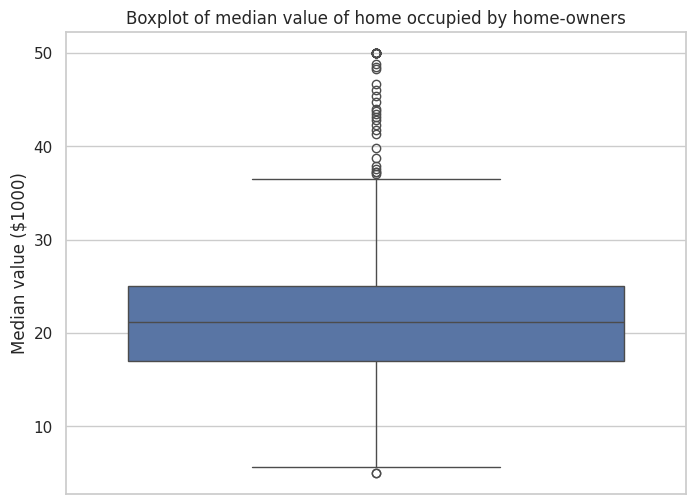

In [5]:
sns.set(style="whitegrid")
# 1. For the "Median value of owner-occupied homes" boxplot 
plt.figure(figsize=(8,6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of median value of home occupied by home-owners")
plt.ylabel("Median value ($1000)")
plt.show()

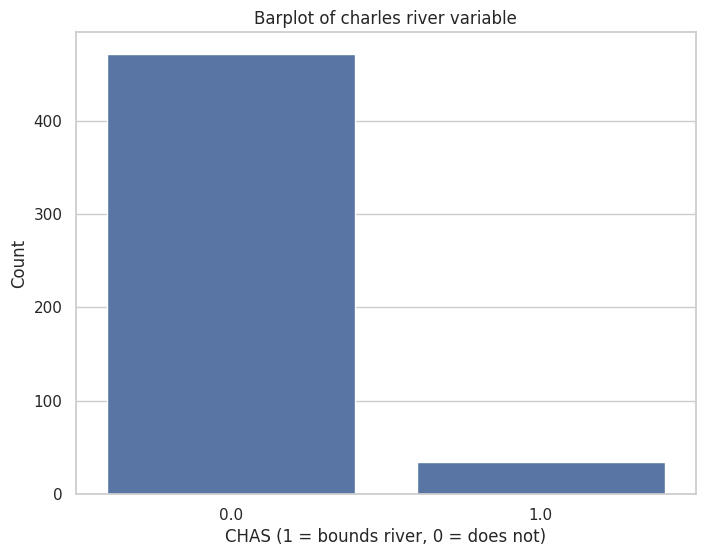

In [6]:
# 2. Barplot for the Charles river variable
plt.figure(figsize=(8,6))
sns.countplot(x='CHAS',data=boston_df)
plt.title("Barplot of charles river variable")
plt.ylabel("Count")
plt.xlabel("CHAS (1 = bounds river, 0 = does not)")
plt.show()

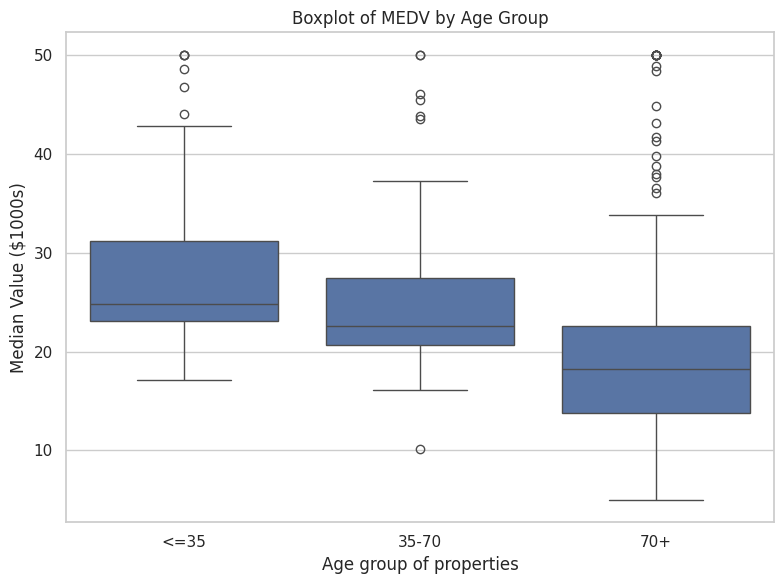

In [7]:
# a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['<=35','35-70','70+'])
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age group of properties')
plt.ylabel('Median Value ($1000s)')
plt.tight_layout()
plt.show()

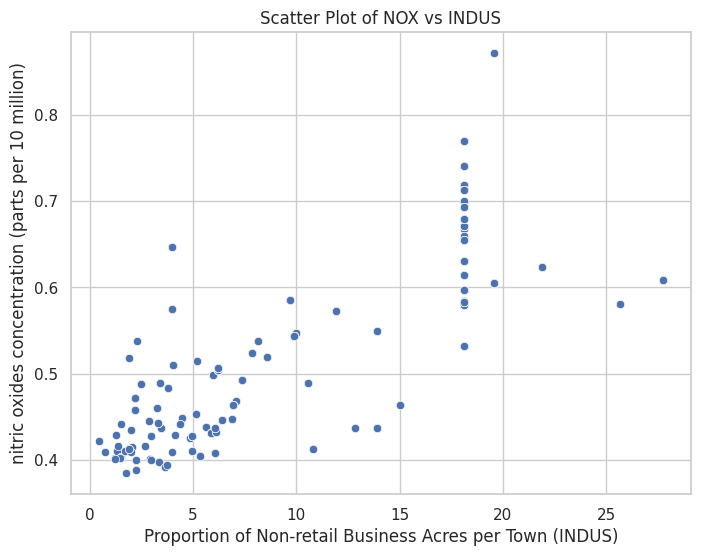

In [8]:
# 4. Scatter plot of NOX and INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS',y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('nitric oxides concentration (parts per 10 million)')
plt.show()

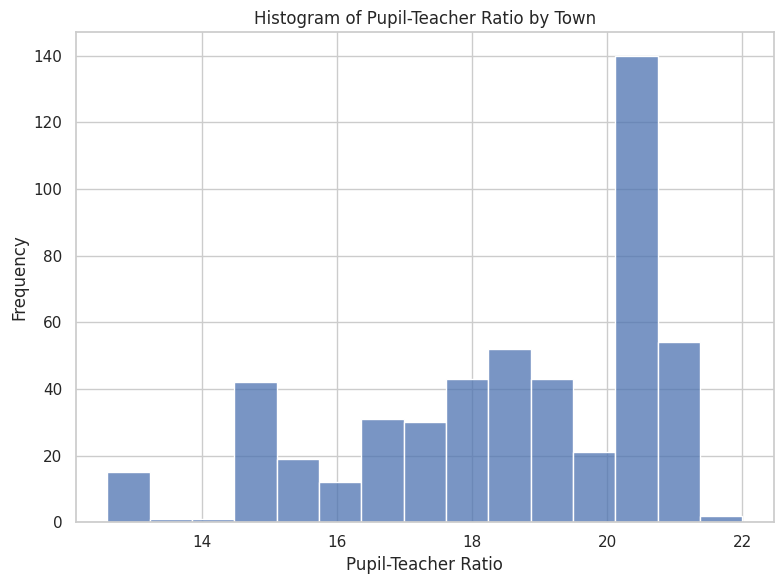

In [9]:
# 5. Histogram of PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)
plt.title('Histogram of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Task 3:

# 1. T-test for independent samples( CHAS vs MEDV)
T-test : Is there a significant difference in medain value of houses bounded by the charles River?
Hypotheses:
* H0:There is no difference in median house values between houses that bound the river and those that do not
* H1:There is a difference in median house valued based on river adjacency



In [10]:
chas_0 = boston_df[boston_df['CHAS'] == 0 ]['MEDV']
chas_1  = boston_df[boston_df['CHAS'] == 1 ]['MEDV']
ttest_stat, ttest_p = scipy.stats.ttest_ind(chas_0,chas_1, equal_var=False)
print("t-test_stat: ",ttest_stat)
print("t-test_p: ", ttest_p)

t-test_stat:  -3.113291312794837
t-test_p:  0.0035671700981375174


Conclusions:
Since p<0.05, we reject the null hypothesis
    There is statistically significant difference in median homve values between properties that bound the charles river and those that don't
    

# 2. AVOVA test for AGE group vs MEDV
Is There a diffeneve in Median Values of houses for each AGE Group?<br>
Hypotheses:<br>
* H0:All AGE groups have the same mean MEDV.
* H1:At least one AGE group has a different mean MEDV.


In [11]:
anova_result = scipy.stats.f_oneway(
    boston_df[boston_df['AGE_GROUP']=='<=35']['MEDV'],
    boston_df[boston_df['AGE_GROUP']=='35-70']['MEDV'],
    boston_df[boston_df['AGE_GROUP']=='70+']['MEDV']
)
print("ANOVA Result : ",anova_result)

ANOVA Result :  F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))


Conclusion:<br>
Since p < 0.05, we reject the null hypothesis.<br>
There is a significant differennce in median home values between at least two of the AGE groups.

# 3. Pearson correlation between NOX and INDUS
Is there a relationship between NOX and INDUS?
Hypotheses:<br>
* H0: There is no linear correlation betweenNOX and INDUS
* H1: There is a linear correlation
  

In [12]:
pearson_corr, pearson_p = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print("Pearsons Correlation: ",pearson_corr)
print("P value: ",pearson_p)

Pearsons Correlation:  0.763651446920915
P value:  7.913361061241263e-98


Conclusion:<br>
Since p < 0.05, we reject the null hypothesis.<br>
There is a strong and statisticallyt significant positive correlation between NOX and INDUS.

# 4. Linear regression (DIS vs MEDV)
What is the impact of DIS(distance to employment centres) on MEDV?


In [13]:
reg_model = smf.ols('MEDV ~ DIS', data=boston_df).fit()
reg_summary = reg_model.summary()s
print(reg_summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        10:32:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Conclusion: <br>
The regression shows a statistically significant positive relationship between distance to employment centers and home value.